# Introduction


# Data Cleaning

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
from statistics import variance
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df1 = pd.read_csv('steps.csv', sep = ';')
#df1.head()
#only dates

df2 = pd.read_csv('survey.csv')
#df2.head()
#different columns with ID, city, gender, age, etc.

In [2]:
df = pd.merge(df1, df2, on = 'id') #column of id is the common identifier
#df.head()

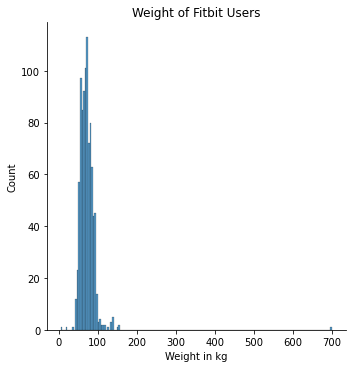

In [3]:
sns.displot(df['weight'].dropna(), kde=False) #Selecting the weight column.
plt.title('Weight of Fitbit Users')
plt.xlabel('Weight in kg')
plt.ylabel('Count')
plt.show()

In [4]:
def above_200(x): #anything above 200kg in the column "weight"
    if(x > 200): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_200) #apply it to the entire column "weight"

In [5]:
def below_40(x): #anything above 200kg in the column "weight"
    if(x < 40): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_40) #apply it to the entire column "weight"

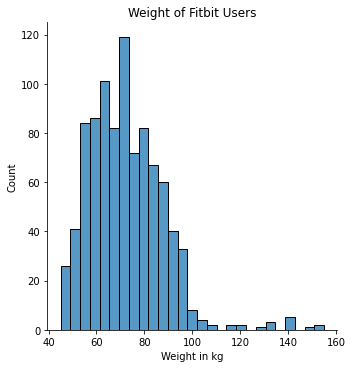

In [6]:
sns.displot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of Fitbit Users')
plt.xlabel('Weight in kg')
plt.ylabel('Count')
plt.show()

#### Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure

In [7]:
df['mean'] = df.iloc[0:,2:329].mean(axis=1) #are the rows correct (2:329)???

#### Show the head() of the resulting data frame


In [8]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


# Exploratory Data Analysis 
### An analysis of mean steps per participant: Graph of the distribution
#### Histogram
According to Healthline, the average steps per day for French people is 5,141. Furthermore, very active jobs - for example, waiters and nurses, "still" only have 22778 steps/day (waiters) & 16390 steps/day (nurses). Hence, the decision was made to clean the "mean" data for steps below 30000 steps/day. 
https://www.healthline.com/health/average-steps-per-day#country

#### mean, median, variance
Variance measures the spread of random data in a set from its mean or median value. A low value for variance indicates that the data are clustered together and are not spread apart widely, whereas a high value would indicate that the data in the given set are much more spread apart from the average value. 

In [9]:
mean_size = df['mean'].mean()

In [10]:
median_size = df['mean'].median()

In [11]:
print("Variance of 'mean' is % s " %(variance(df['mean']))) 

Variance of 'mean' is nan 


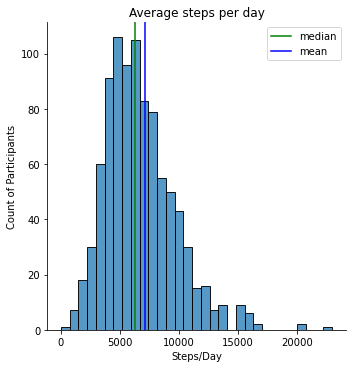

In [12]:
df = df[(df['mean'] < 30000)]
sns.displot(df['mean'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Average steps per day')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend()
plt.xlabel('Steps/Day')
plt.ylabel('Count of Participants')
plt.show()

The mean is 6705 steps/day.
The median is 6240 steps/day.
Variance of 'mean' is 8715971. As visible in the histogram, the data is slightly positively skewed. However, before cleaning the data according to 30000 steps/day, possible outliers were to be identified. 

#### The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
Describe and interpret the results

# Feature Engineering
The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.

BMI: Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women.

BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared.

In [13]:
df['height in metres'] = df['height'] / 100

In [14]:
df['BMI'] = df['weight'] / df['height in metres']**2

In [15]:
def above_100(x): #anything above 200kg in the column "weight"
    if(x > 100): 
        return float('NaN')
    else: 
        return x
df['BMI'] = df['BMI'].apply(above_100) #apply it to the entire column "weight"

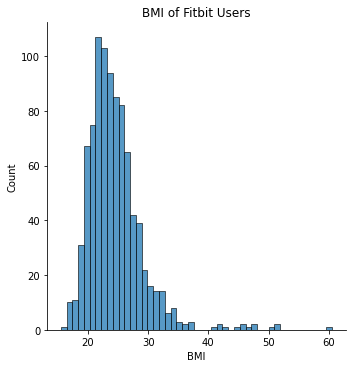

In [16]:
sns.displot(df['BMI'].dropna(), kde=False) #I need to drop the NA's for the plot
plt.title('BMI of Fitbit Users')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Exploratory Data Analysis (Week 2)
See last week for the first part (distribution of steps). In addition:
Make a scatterplot matrix of the numerical variables
Make a correlation matrix of the numerical variables
Describe and interpret the results

#### Correlation Matrix

In [45]:
corr = df[['height', 'weight', 'education']].corr() 
print(corr)

             height    weight  education
height     1.000000  0.508805  -0.042001
weight     0.508805  1.000000   0.009184
education -0.042001  0.009184   1.000000


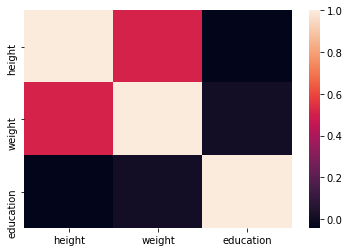

In [46]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

#### Scatterplot Matrix

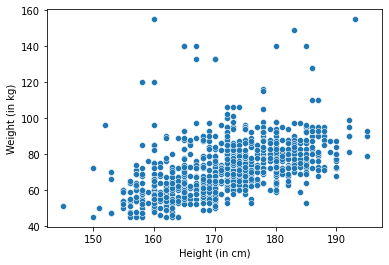

In [19]:
sns.scatterplot(x='height',y='weight',data=df)
plt.xlabel('Height (in cm)')
plt.ylabel('Weight (in kg)')
plt.show()

Describe and interpret the results

# Predictive Model
## Explain linear regression in your own words
Linear regression is a model that estimates the relationship between one independent variable and one dependent variable using a straight line.
Example: Based on a body weigth of 70kg (dependent variable, y), height should be xx cm (independent variable). 
## Create dummy variables for the categorical variables


In [20]:
dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,hh_size,education,education_1,height,weight,mean,height in metres,BMI,Female,Male
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,4,4,Master or doctorate,178.0,98.0,10205.521212,1.78,30.930438,0,1
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,1,3,Bachelor,180.0,77.0,5687.423313,1.80,23.765432,0,1
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,2,2,Master or doctorate,180.0,83.0,8301.729730,1.80,25.617284,0,1
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,Bachelor,178.0,80.0,3633.200000,1.78,25.249337,0,1
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,4,Bachelor,167.0,61.0,5312.129630,1.67,21.872423,1,0


In [50]:
corr = df[['height', 'weight', 'education', 'Female', 'BMI', 'mean', 'Male']].corr() 
print(corr)

             height    weight  education    Female       BMI      mean  \
height     1.000000  0.508805  -0.042001 -0.713163  0.020500 -0.086123   
weight     0.508805  1.000000   0.009184 -0.419616  0.866195 -0.062885   
education -0.042001  0.009184   1.000000  0.010309  0.026851  0.024053   
Female    -0.713163 -0.419616   0.010309  1.000000 -0.083153  0.066483   
BMI        0.020500  0.866195   0.026851 -0.083153  1.000000 -0.025088   
mean      -0.086123 -0.062885   0.024053  0.066483 -0.025088  1.000000   
Male       0.713163  0.419616  -0.010309 -1.000000  0.083153 -0.066483   

               Male  
height     0.713163  
weight     0.419616  
education -0.010309  
Female    -1.000000  
BMI        0.083153  
mean      -0.066483  
Male       1.000000  


## Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

In [55]:
df1 = df[['id', 'height', 'weight', 'Female', 'mean']]
df1 = df1.dropna() #get rid of rows with empty cells

,id,height,weight,Female,mean
0,1,178.0,98.0,0,10205.521212
1,2,180.0,77.0,0,5687.423313
2,3,180.0,83.0,0,8301.729730
3,4,178.0,80.0,0,3633.200000
4,5,167.0,61.0,1,5312.129630


In [58]:
X = df1[['id', 'height', 'weight', 'Female']] #create the X matrix

y = df1['mean'] #create the y-variable #this is the dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=50) #split the data, store it into different variables

X_train.head() #show the head of the training set

lm = LinearRegression() #this creates a new LR model
lm.fit(X_train, y_train) #this "fits" the model on the training data

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [24]:
y_test_p = lm.predict(X_test) #use built-in predict() method to generate predictions; store in original dataframe

# Evaluating the Model

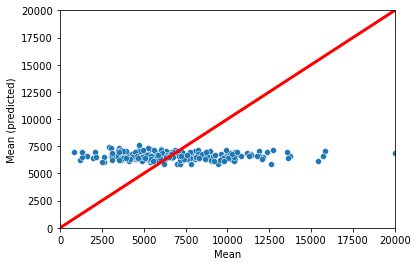

In [25]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 20000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(0, 20000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1.5e6], [0, 1.5e6], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Mean')
plt.ylabel('Mean (predicted)')
plt.show()

In [26]:
r2_score(y_test, y_test_p)

-0.03136821819161617

Model has been very poorly selected as the r2 score is negative. Hence, another model needs to be applied.

In [27]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

3008.9978962125715

#### Simple Linear Regression With scikit-learn

In [28]:
r_sq = lm.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0015386969192385802


In [52]:
df['mean_p'] = lm.predict(X) #use built-in predict() method to generate predictions; store in original dataframe
df.head(50)

ValueError: Length of values (914) does not match length of index (921)

0.15% is still a very weak correlation. Another model needs to be applied.

#### Multiple Linear Regression With scikit-learn

In [29]:
r_sq = lm.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)

coefficient of determination: 0.0015386969192385802
intercept: 12837.391063296389
slope: [-1.76602314e-02 -3.95318616e+01  8.15169904e+00  2.21100989e+01]


In [30]:
y_pred = lm.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[6599.56853549 6349.30147215 6398.19400615 6452.7849721  6754.84560719
 6630.42566116 6530.56908115 7053.95222383 6622.32925033 7094.67539856
 6675.6759225  6944.22959477 6490.93125812 6793.31836008 7020.78707028
 6196.62521426 6512.86244722 6249.95422621 6974.24184198 6258.50534056
 6733.77018677 6489.52802226 6238.46906115 6869.73455374 6664.77535779
 6527.87087834 6927.64363299 6957.77950182 7141.57101885 6218.7968766
 6412.75862397 7193.67339724 7171.65390699 6887.98814972 6359.30599041
 6430.20035443 6667.04739722 5861.64220637 6217.41130097 6533.64853392
 6307.8365677  7128.7179384  6039.21225451 6494.82026888 6564.59626827
 5998.40077862 6291.409548   6729.92226653 6849.40035792 7226.37938478
 7590.73491419 6727.39835852 6333.28871535 6559.85725888 6369.1053559
 7012.31071707 6760.02512242 6262.28838994 6858.92855506 7222.16571983
 6349.45083158 6390.98356431 7052.51085487 6277.25919308 6627.00338886
 7295.34747601 7171.03579889 6163.06476561 6741.84843224 63

# Conclusion